In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_diabetes
data = load_diabetes()



In [6]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [7]:
X = data.data
y=data.target


In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [10]:
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = lr.predict(X_test)

In [12]:
from sklearn.metrics import r2_score, mean_squared_error

print('R2_score: ', r2_score(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2_score:  0.4399338661568968
RMSE:  55.627840795469155


In [13]:
from sklearn.linear_model import Ridge

r=Ridge(alpha=0.001)

r.fit(X_train, y_train)

Ridge(alpha=0.001)

In [14]:
y_pred1 = r.predict(X_test)

print('R2 score: ', y_test, y_pred1)

print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred1)))

R2 score:  [ 73. 233.  97. 111. 277. 341.  64.  68.  65. 178. 142.  77. 244. 115.
 258.  87. 220.  86.  74. 132. 136. 220.  91. 235. 148. 317. 131.  84.
  65. 217. 306.  79. 158.  54. 123. 174. 237. 212. 179. 281. 187. 200.
  68. 163. 141. 202. 178. 242.  47. 131. 243. 142. 200.  89. 232.  55.
 253. 128. 104. 184. 110. 198.  81. 195. 150.  63. 151. 233. 178.  84.
 237. 109. 131. 252. 200. 160. 200.  51. 111.  77. 201.  88.  78. 243.
 268.  55. 270. 288.  91.] [153.89837    204.9370185  124.83741833 105.66585521 260.14215776
 255.40882517 118.1448417  119.13014663 100.99471812 190.30849395
 141.69540362 172.11556459 174.14598082 134.56930513 295.37040156
  93.4153447  211.58999325 155.93461448 133.80829033 120.08500236
 149.43085634 165.45765309 150.35102176 176.14460641 132.53019655
 220.51276721 197.268926    96.2457902   50.92159897 231.13281388
 242.23266238 113.66960118  67.38806217  94.45600205 201.74128397
 166.35889214 159.73694988 192.41838797 114.39755863 233.67075504
 141.024

In [15]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [18]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

param_grid = {
    'ridge__alpha': [0.001, 0.01,1.0],
    'ridge__solver': ['auto', 'svd', 'cholesky', 'saga']
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'ridge__alpha': [0.001, 0.01, 1.0],
                         'ridge__solver': ['auto', 'svd', 'cholesky', 'saga']},
             scoring='r2')

In [21]:
print('Best Params:',grid.best_params_)
print('Best R2 score: ', grid.best_score_)

Best Params: {'ridge__alpha': 1.0, 'ridge__solver': 'svd'}
Best R2 score:  0.4873809741700475


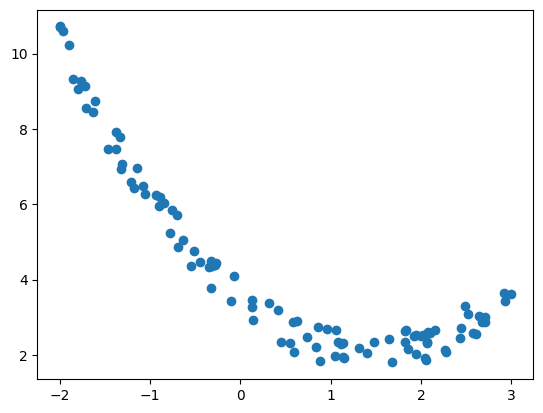

In [26]:
m = 100
X1 = 5*np.random.rand(m,1) - 2
X2 = 0.7*X1**2-2*X1+3+np.random.rand(m,1)

plt.scatter(X1,X2)
plt.show()

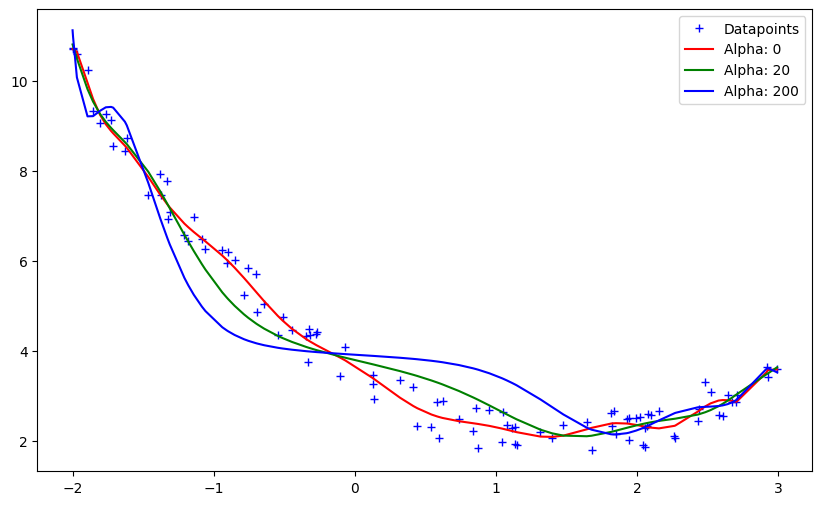

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(X1,X2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(X1,X2)
    return model.predict(X1)

alphas = [0,20,200]
cs = ['r', 'g', 'b']
plt.figure(figsize=(10,6))
plt.plot(X1, X2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(X1, X2, alpha)
    plt.plot(sorted(X1[:,0]), preds[np.argsort(X1[:,0])],c,label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()